## Processing k6 results

In [1]:
import json
from unidecode import unidecode
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from operator import itemgetter
from importlib import reload # reload 


sys.path.append('../common')
import requestTimeUtils
import utils

reload(requestTimeUtils)

SETUP_PATH = './setup.json'
f = open(SETUP_PATH)
data = json.load(f)

In [2]:

dir = utils.get_last_result_dir(test_result_base_dir=data["test_result_base_dir"])
print(dir)
apps_dfs, framework_names, apps_durations_dfs = requestTimeUtils.load_data(dir=dir, apps=data['apps'])

out/out_2024-06-01_15-37-29


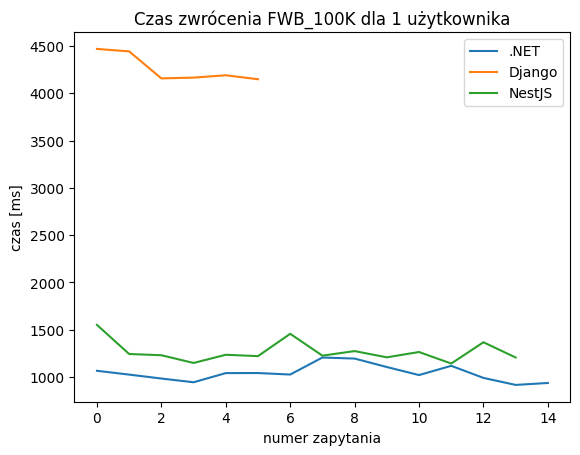

In [89]:
requestTimeUtils.draw_timeline(
    framework_names=framework_names, 
    apps_dfs=apps_dfs, 
    title=f'Czas zwrócenia FWB_100K dla 1 użytkownika'
    )

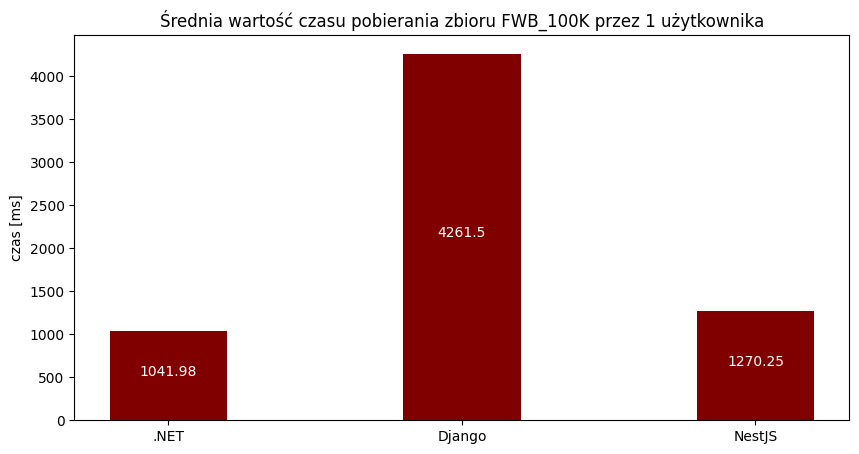

In [93]:
requestTimeUtils.draw_avg_duration(
    framework_names = list(map(lambda x: x['name'], data["apps"].values())),
    mean_durations = [apps_durations_df.mean() for apps_durations_df in apps_durations_dfs],
    title = "Średnia wartość czasu pobierania zbioru FWB_100K przez 1 użytkownika"
)

### Statistics about duration

In [3]:
for idx in range(len(framework_names)):
    print(f'\n{framework_names[idx]}:')
    df = pd.DataFrame(apps_dfs[idx])
    df_1 = df.loc[(df['metric_name'] == 'http_req_duration')][:]
    df_1 = df_1.reset_index(drop=True)
    duration = df_1['metric_value']
    print(duration.describe())


.NET:
count      15.000000
mean     1041.975052
std        86.200755
min       917.174416
25%       988.029243
50%      1026.811790
75%      1086.362811
max      1206.719638
Name: metric_value, dtype: float64

Django:
count       6.000000
mean     4261.498645
std       150.831112
min      4147.717669
25%      4158.694330
50%      4177.217484
75%      4378.986361
max      4468.076636
Name: metric_value, dtype: float64

NestJS:
count      14.000000
mean     1270.247623
std       114.357789
min      1143.113031
25%      1212.008230
50%      1233.313270
75%      1272.264358
max      1551.469642
Name: metric_value, dtype: float64


Text(0.5, 1.0, 'Quantity of records for .NET with 1 user')

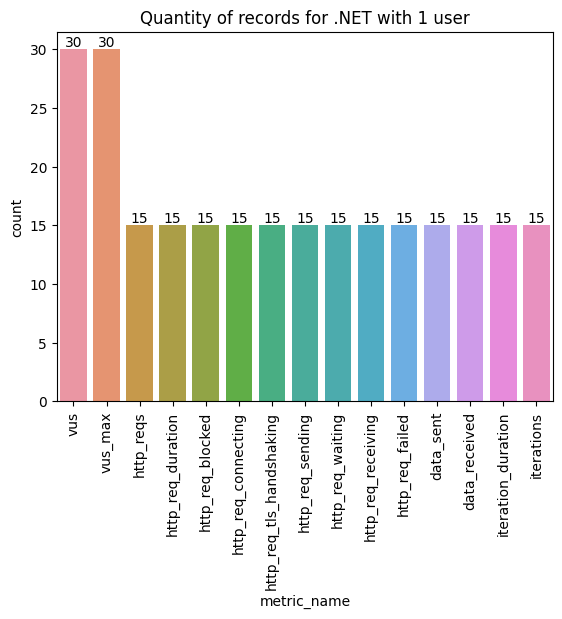

In [16]:
index = 0
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']

chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')


Text(0.5, 1.0, 'Quantity of records for Django with 1 user')

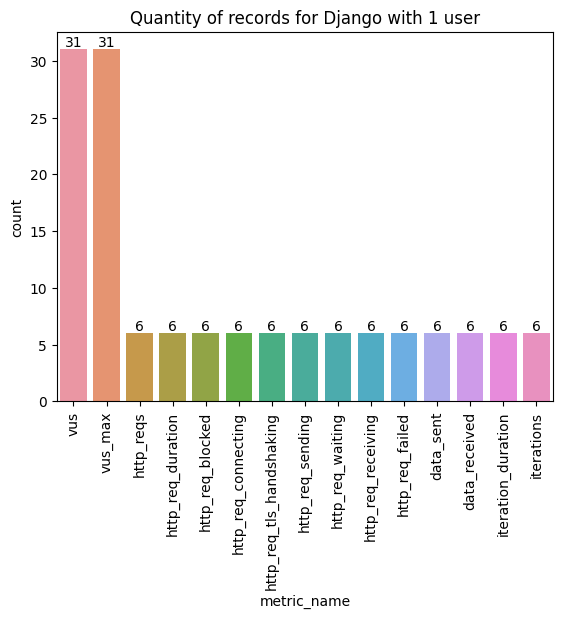

In [17]:
index = 1
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')

Text(0.5, 1.0, 'Quantity of records for NestJS with 1 user')

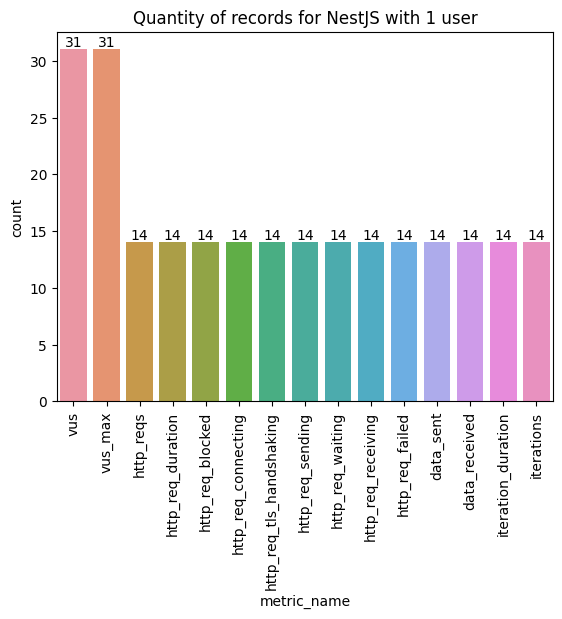

In [18]:
index = 2
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')